In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

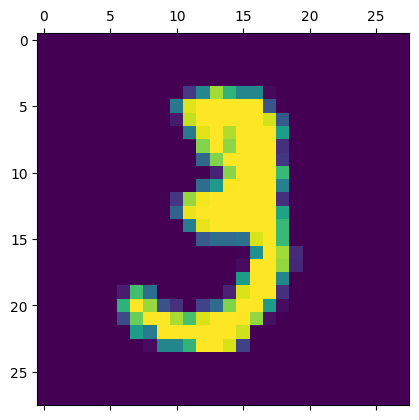

In [19]:
plt.matshow(X_train[10])

In [21]:
y_train[10]

3

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [47]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0843 - accuracy: 0.9771


[0.08427076041698456, 0.9771000146865845]

In [48]:
X_test.shape

(10000, 28, 28)

In [49]:
X_train_flattened=X_test[1111]

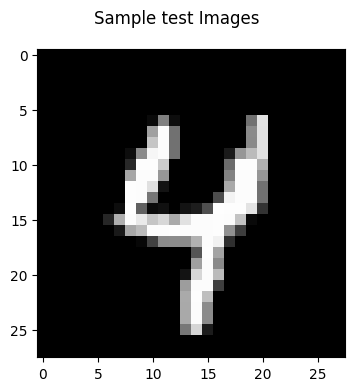

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.suptitle("Sample test Images")
plt.imshow(X_train_flattened , cmap='gray')

In [51]:
image_to_predict = X_train_flattened.reshape(1, 28, 28)
predictions = model.predict(image_to_predict)
predicted_class = np.argmax(predictions)

print("Predicted Digit:", predicted_class)

1/1 [==============================] - 0s 40ms/step
Predicted Digit: 4
